<a href="https://colab.research.google.com/github/cristianmunoz1/Intro_ML_project/blob/main/07_Sequential_Forward_Selection_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score
)
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('data_class.csv')

In [ ]:
df_m = df.copy()

In [ ]:
df_m

,AgeMonths,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,PetType_Bird,PetType_Cat,...,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Siamese,Color_Black,Color_Brown,Color_Gray,Color_Orange,Color_White
0,0.730337,0.138783,1,0,0.295455,0.280561,0,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.404494,0.520009,0,0,0.079545,0.470942,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.758427,0.036514,0,0,0.954545,0.771543,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.539326,0.080105,0,0,0.681818,0.434870,1,0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.685393,0.672244,0,0,0.306818,0.028056,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,0.398876,0.897969,1,0,0.738636,0.052104,1,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2003,0.691011,0.127988,1,1,0.659091,0.300601,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2004,0.629213,0.025551,1,0,0.761364,0.605210,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2005,0.061798,0.688239,1,0,0.659091,0.957916,0,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
co_mtx = df_m.corr()

<Axes: >

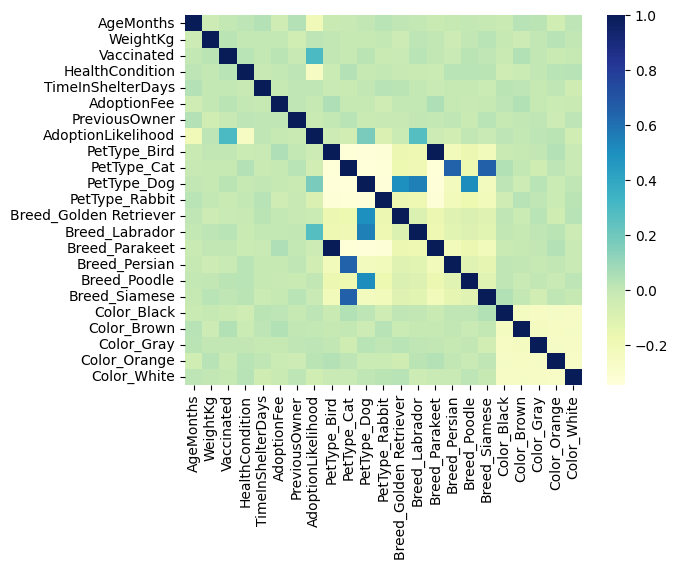

In [ ]:
sns.heatmap(co_mtx, cmap="YlGnBu", annot = False)

In [ ]:
df_corr_adop_likelihood = co_mtx['AdoptionLikelihood']
df_corr_adop_likelihood

,AdoptionLikelihood
AgeMonths,-0.202209
WeightKg,0.017601
Vaccinated,0.301311
HealthCondition,-0.244061
TimeInShelterDays,0.008867
AdoptionFee,-0.005486
PreviousOwner,-0.023065
AdoptionLikelihood,1.000000
PetType_Bird,-0.031944
PetType_Cat,-0.050898


In [ ]:
df_corr_adop_likelihood=df_corr_adop_likelihood.sort_values(axis=0, key=abs, ascending=False)
df_corr_adop_likelihood

,AdoptionLikelihood
AdoptionLikelihood,1.000000
Vaccinated,0.301311
Breed_Labrador,0.272174
HealthCondition,-0.244061
AgeMonths,-0.202209
PetType_Dog,0.170754
PetType_Rabbit,-0.090893
PetType_Cat,-0.050898
Breed_Persian,-0.050414
Color_White,-0.046706


En este caso las características candidatas a ser eliminadas por su baja correlación con la variable de salida son:

In [ ]:
df_corr_adop_likelihood.index[8:]

Index(['Breed_Persian', 'Color_White', 'PetType_Bird', 'Breed_Parakeet',
       'Breed_Golden Retriever', 'PreviousOwner', 'Color_Orange', 'WeightKg',
       'Breed_Siamese', 'Color_Gray', 'Color_Black', 'TimeInShelterDays',
       'AdoptionFee', 'Breed_Poodle', 'Color_Brown'],
      dtype='object')

In [ ]:
X = df_m.drop(['AdoptionLikelihood'], axis=1)
y = df_m['AdoptionLikelihood']

Otra forma de encontrar las características que más información nos proporcionan es por ejemplo con los coeficientes de un modelo de regresión lineal múltiple. Mientras más grande sea el coeficiente, más importante será para la respuesta final.

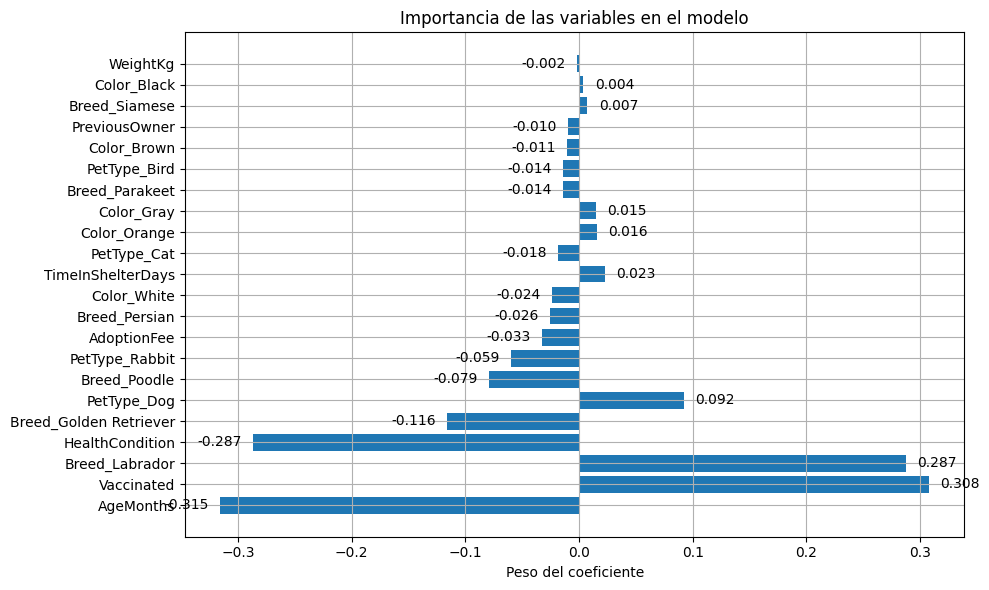

In [ ]:
modelo_final = LinearRegression()
modelo_final.fit(X, y)
coefs = modelo_final.coef_
features = X.columns

sorted_indices = np.argsort(np.abs(coefs))[::-1]
sorted_coefs = coefs[sorted_indices]
sorted_features = features[sorted_indices]

plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_coefs)
plt.xlabel('Peso del coeficiente')
plt.title('Importancia de las variables en el modelo')
plt.grid(True)

for bar, coef in zip(bars, sorted_coefs):
    width = bar.get_width()
    plt.text(
        width + 0.01 if width >= 0 else width - 0.01,
        bar.get_y() + bar.get_height() / 2,
        f'{coef:.3f}',
        va='center',
        ha='left' if width >= 0 else 'right'
    )

plt.tight_layout()
plt.show()


En este caso las variables predictoras que quedarían en el modelo son: AgeMonths, Vaccinated, Breed_Labrador HealthCondition, Breed_Golden Retriever, PetType_Dog, Breed_Poodle. Cada que se haga el entrenamiento del modelo, pueden dar resultados diferentes. Por lo que cuando ejecutes el notebook es posible que los resultados cambien un poco.

## Proceso de selección de características
Llamamos al objeto SequentialFeatureSelector, le pasamos el modelo con el cual queremos que discrimine los más importantes y el número de features que nosotros queremos que tenga el modelo.

In [ ]:
linear_regression = LinearRegression()

In [ ]:
sfs = SequentialFeatureSelector(linear_regression, n_features_to_select=7)

Ajustamos el modelo a los datos

In [ ]:
sfs.fit(X, y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=7)

Obtenemos la máscara de características

In [ ]:
mask = sfs.get_support()

Filtramos X por columnas según la máscara

In [ ]:
X = X.loc[:, mask]

In [ ]:
X.shape

(2007, 7)

Concatenamos la variable salida para exportar la información

In [ ]:
df_ret = pd.concat([X, y], axis = 'columns')
df_ret.shape

(2007, 8)

Exploramos qué columnas quedaron en nuestros datos

In [ ]:
df_ret.columns

Index(['AgeMonths', 'Vaccinated', 'HealthCondition', 'PetType_Rabbit',
       'Breed_Labrador', 'Breed_Poodle', 'Color_White', 'AdoptionLikelihood'],
      dtype='object')

# Implementación de algoritmo de SFS con Información mutua

In [ ]:
data = pd.read_csv("data_class.csv")
X = data.drop(columns=["AdoptionLikelihood"])
y = data["AdoptionLikelihood"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_array = X_train.to_numpy()
feature_names = X_train.columns.to_numpy()

n_total = X_array.shape[1]
max_features = 7
selected_idxs = []
remaining_idxs = list(range(n_total))

for _ in range(max_features):
    best_score = -np.inf
    best_feature = None

    for idx in remaining_idxs:
        temp_selection = selected_idxs + [idx]
        X_subset = X_array[:, temp_selection]
        mi = mutual_info_classif(X_subset, y_train, discrete_features='auto')
        score = mi.mean()

        if score > best_score:
            best_score = score
            best_feature = idx

    if best_feature is not None:
        selected_idxs.append(best_feature)
        remaining_idxs.remove(best_feature)
    else:
        break

selected_features = feature_names[selected_idxs]
print("Características seleccionadas con SFS + Información Mutua:")
print(selected_features)

X_selected = X[selected_features]
df_export = pd.concat([X_selected, y], axis = 1)
df_export.to_csv("data_sfs.csv")

Características seleccionadas con SFS + Información Mutua:
['Vaccinated' 'AgeMonths' 'HealthCondition' 'TimeInShelterDays'
 'Breed_Labrador' 'AdoptionFee' 'Color_Gray']
